# PIL #


In [2]:
from PIL import Image  # PIL 라이브러리에서 Image 모듈을 import
from numpy import asarray  # numpy 라이브러리에서 asarray 함수를 import

import pickle  # pickle 라이브러리를 import
import numpy as np  # numpy 라이브러리를 np로 alias하여 import
import pandas as pd  # pandas 라이브러리를 pd로 alias하여 import
import matplotlib.pyplot as plt  # matplotlib 라이브러리에서 pyplot 모듈을 import하여 plt로 alias


# Load Image #

(666, 1000, 3)
<class 'numpy.ndarray'>


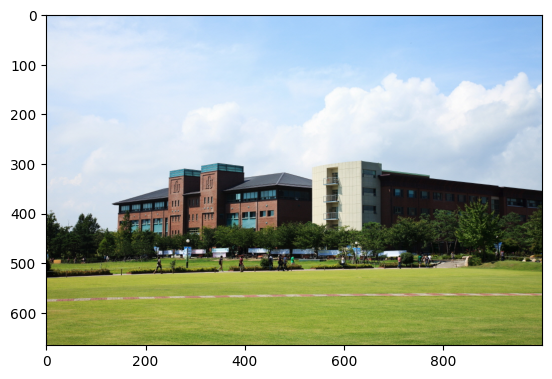

In [2]:
img = Image.open('./data1/school.jpg')

numpydata = asarray(img)

print(numpydata.shape)
print(type(numpydata))
plt.imshow(numpydata)

# RGB #

In [3]:
plt.figure(figsize=(20,5))

print('shape' , numpydata.shape)
print('type' , type(numpydata))

plt.subplot(141)
plt.imshow(numpydata[300:600 , 300:600 , : ])
plt.axis('off')

plt.subplot(142)
plt.imshow(numpydata[300:600 , 300:600 , 0 ])
plt.axis('off')

plt.subplot(143)
plt.imshow(numpydata[300:600 , 300:600 , 1 ])
plt.axis('off')

plt.subplot(144)
plt.imshow(numpydata[300:600 , 300:600 , 2 ])
plt.axis('off')

# Image Processing #
### change color ###

<class 'numpy.ndarray'>
(666, 1000)


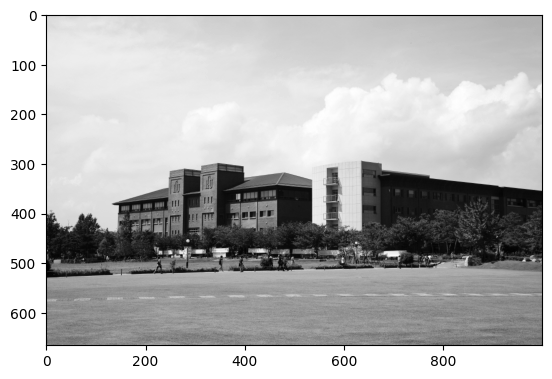

In [ ]:
img = Image.open('./data1/school.jpg').convert('L')

numpydata = asarray(img)

print(type(numpydata))

print(numpydata.shape)
plt.imshow(numpydata , cmap='gray')

### Resize ###

(1000, 666)
(300, 200)


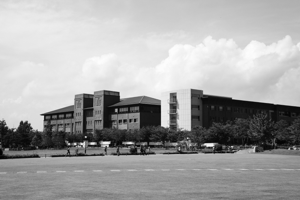

In [ ]:
print(img.size)
img2 = img.resize((300,200))
print(img2.size)
img2

### Rotate Image ###

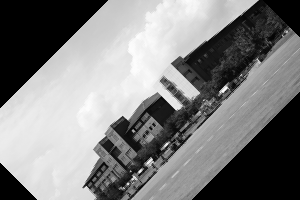

In [ ]:
img3 = img2.rotate(45)
img3

# MINST Dataset #

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(type(x_train[0,0,0]))


x_train = x_train.astype('float32') / 255.
n=1
# plt.imshow(x_train[n], cmap='Greys', interpolation='nearest') 
# plt.show()

(60000, 28, 28)
<class 'numpy.uint8'>


# MNIST DATASET (REAL IMPLEMENTATION CODE) #

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_train.shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)
#input_shape

In [ ]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

# CNN IMPLEMENTATION (CREATE A MODEL) #

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [ ]:
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# CNN IMPLEMENTATION #

In [ ]:
model.summary()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 3136)             

# CNN IMPLEMENTATION (COMPILE AND TRAIN) #

In [ ]:
# batch_size = 128
# epochs = 12
batch_size = 64
epochs = 30
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
hist = model.fit(x_train, y_train,
                batch_size=batch_size, 
                epochs=epochs,
                verbose=1, 
                validation_data=(x_test, y_test)
                )
model.save('cnn_model.h5')

Epoch 1/30


2023-03-29 02:52:29.516455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-29 02:52:29.652298: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x153271ee0
2023-03-29 02:52:29.652334: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x153271ee0
2023-03-29 02:52:29.657997: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x153271ee0
2023-03-29 02:52:29.658022: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x153271ee0
2023-03-29 02:52:29.672516: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/p0/zz35vq3x28g2ldblbnhf65nw0000gn/T/ipykernel_1815/3573173528.py", line 6, in <module>
      hist = model.fit(x_train, y_train,
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/juno/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
could not find registered platform with id: 0x153271ee0
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_12235]

# CNN IMPLEMENTATION (SHOW ACCURACY GRAPH) #

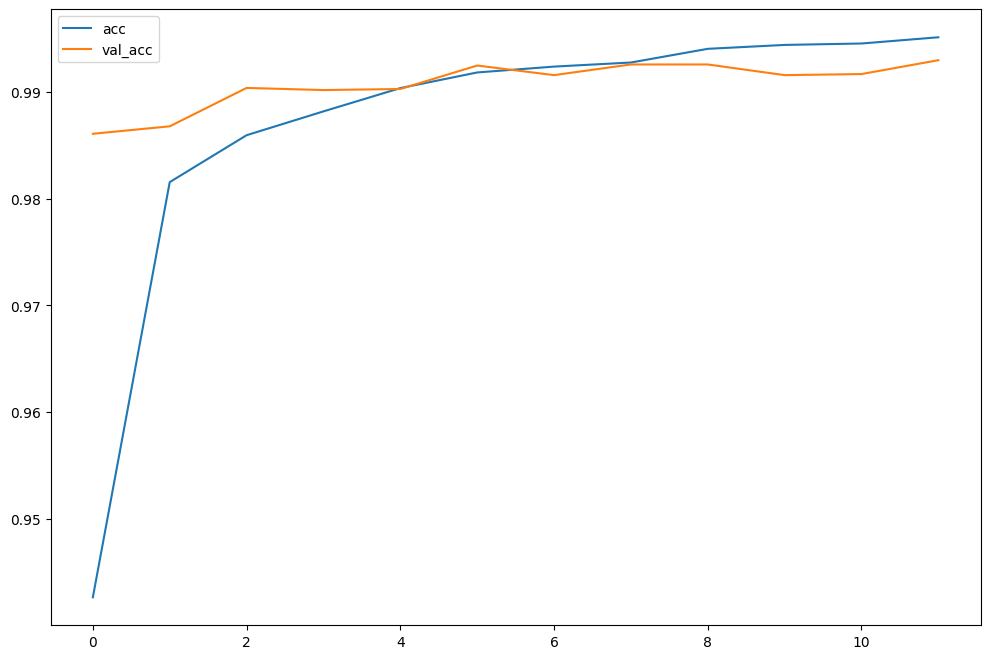

In [ ]:
plt.figure(figsize=(12,8))
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


# plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

# CNN IMPLEMENTATION (SHOW WRONG RESULTS) #

313/313 [==============================] - 1s 5ms/step


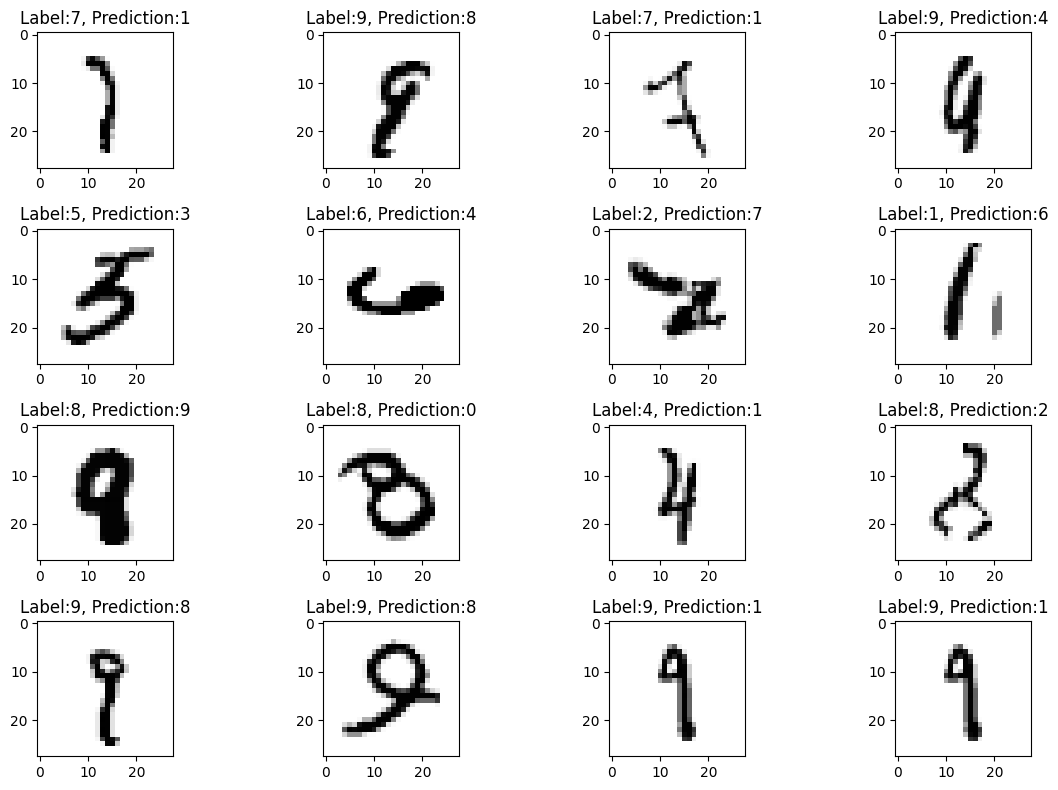

In [ ]:
import random
predicted_result = model.predict(x_test) 
predicted_labels = np.argmax(predicted_result, axis=1) 
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]: 
        wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16) 
count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n]) 
    plt.title(tmp)
    
plt.tight_layout() 
plt.show()

# How would you test your own hand writing data? #

1/1 [==============================] - 0s 13ms/step


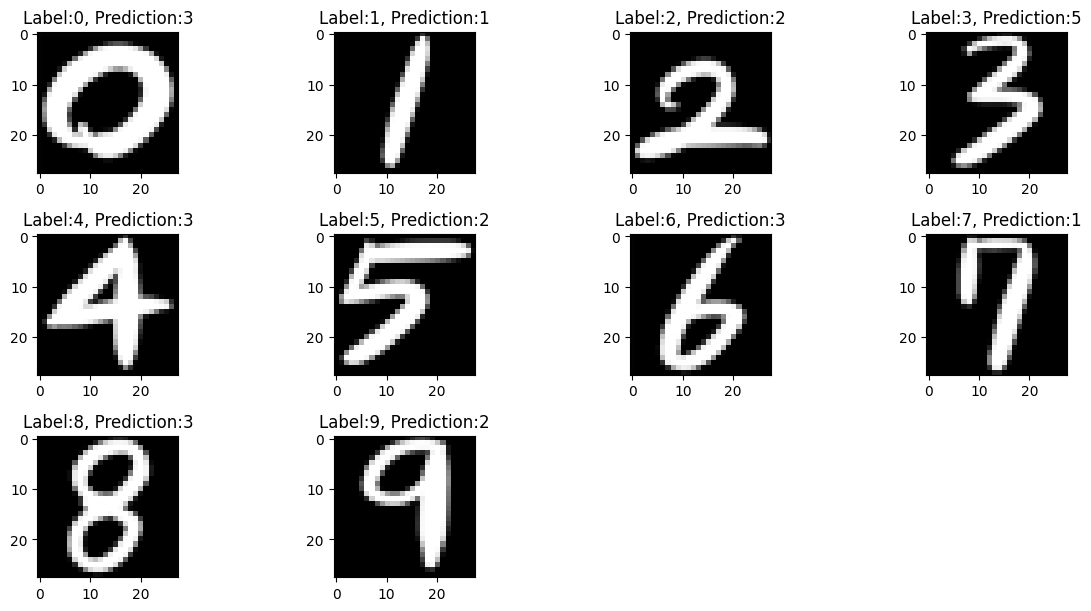

In [ ]:
import numpy as np
from PIL import Image

image_array = []

for i in range(10):
    image = Image.open('./data3/' + str(i) + '.png')
    
    image = image.convert('L')

    image = image.resize((28, 28))

    image_array.append(np.array(image))

    image_array[i] = image_array[i].reshape((28, 28, 1))

image_array_np = np.array(image_array)

predicted_result_juno = model.predict(image_array_np) 
predicted_labels_juno = np.argmax(predicted_result_juno, axis=1) 

predicted_labels_juno

plt.figure(figsize=(12,8))

count=0
for i in range(10):
    count+=1
    plt.subplot(4, 4, count)
    plt.imshow(image_array_np[i].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(i) + ", Prediction:" + str(predicted_labels_juno[i]) 
    plt.title(tmp)

plt.tight_layout() 
plt.show()



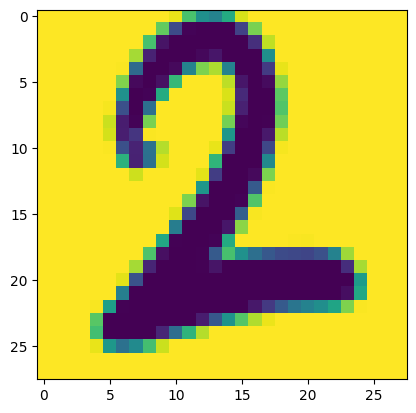

In [ ]:
# image = Image.open('./data/' + str(i) + '.png')
image = Image.open('./data2/' + '2' + '.png')
image = image.convert('L')
image = image.resize((28, 28))
plt.imshow(image)